# This notebook analyzes the Zoo sample against galaxies with z < 0.15

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM
from scipy import stats as sci

In [7]:
### Samples 02/18/20
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidates_032020.csv')
#zoo_30 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_30_021920.csv')

In [8]:
len(zoo)

36

## Load in MagPhys,

In [9]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
hdul.verify('fix')
magphys_data = hdul[1].data  # assume the first extension is a table
#print(gama_data.columns)

# take ID and templates/z from first and second fit
magphys_id = magphys_data.CATAID
magphys_mass = magphys_data.mass_stellar_best_fit
magphys_z = magphys_data.Z

#zip to list
magphys_list = list(zip(magphys_id, magphys_mass, magphys_z))

# create dataframe
magphys = pd.DataFrame(magphys_list, columns = ['GAMA_ID','STELLAR_MASS','Z'])
magphys

,GAMA_ID,STELLAR_MASS,Z
0,6802,1.117000e+09,0.0505
1,6806,8.560000e+10,0.3312
2,6808,5.503000e+10,0.2294
3,6810,1.204000e+11,0.3263
4,6813,1.025000e+11,0.4846
5,6816,2.230000e+09,0.0764
6,6820,8.074000e+10,0.4141
7,6821,3.167000e+07,0.0038
8,6826,5.397000e+09,0.0728
9,6830,3.006000e+09,0.1140


## GalaxyZoo takes galaxies at z < 0.15

In [10]:
gama_zcut = magphys[magphys.Z < 0.15]
gama_zcut.drop_duplicates(subset = 'GAMA_ID',
                       keep = 'first',
                        inplace = True)
gama_zcut

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,GAMA_ID,STELLAR_MASS,Z
0,6802,1.117000e+09,0.0505
5,6816,2.230000e+09,0.0764
7,6821,3.167000e+07,0.0038
8,6826,5.397000e+09,0.0728
9,6830,3.006000e+09,0.1140
11,6837,3.058000e+09,0.0743
12,6838,5.745000e+07,0.0746
13,6839,6.156000e+09,0.1066
15,6842,1.519000e+09,0.0938
16,6844,4.659000e+10,0.0973


In [11]:
#gama_zcut.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/gama_zoo_cut.csv')

## Plot pg z to log(M*)

Text(0, 0.5, 'Redshift (z)')

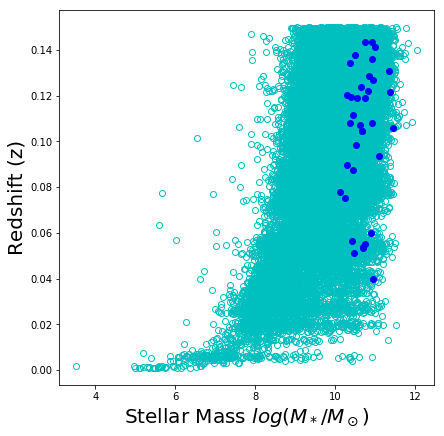

In [12]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
#rect_histx = [left, lower_h, width, 0.2]
#rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
#axHistx = plt.axes(rect_histx)
#axHisty = plt.axes(rect_histy)

binwidth = 0.5
bins=20

    # no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.plot(np.log10(gama_zcut.STELLAR_MASS), gama_zcut.Z, 'co', fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'bo')

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)

#axHisty.hist(spec.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHisty.hist(pg_sample.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='c', histtype = 'step', linewidth=3)

#axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHistx.hist(np.log10(pg_sample.STELLAR_MASS), range=[7,12], bins=bins,color='c', histtype = 'step', linewidth=3)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/spec_gama_pg_zmass.png')

# K-S tests of z and M*

In [13]:
sci.ks_2samp(zoo.Z, gama_zcut.Z)

Ks_2sampResult(statistic=0.09966024199863593, pvalue=0.8487308796145936)

In [14]:
sci.ks_2samp(zoo.STELLAR_MASS, gama_zcut.STELLAR_MASS)

Ks_2sampResult(statistic=0.6209705486930334, pvalue=4.923393883008469e-13)

# AD tests of z and M*

In [55]:
sci.anderson_ksamp([.Z, pg.Z])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=177.37253002455355, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [54]:
sci.anderson_ksamp([spec.STELLAR_MASS, pg.STELLAR_MASS])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=161.47716684141713, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

## K-S Test of Zoo_30 sample

In [11]:
sci.ks_2samp(zoo_30.Z, gama_zcut.Z)

Ks_2sampResult(statistic=0.12601611640184907, pvalue=0.10659703280856753)

In [12]:
sci.ks_2samp(zoo_30.STELLAR_MASS, gama_zcut.STELLAR_MASS)

Ks_2sampResult(statistic=0.2077424407002299, pvalue=0.0006931516645853038)